# KDE-function analysis exploration

In [1]:
import csv
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [1]:
dirname = dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon'

In [4]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [5]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos12_Scr-59_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0805_Pos5_Scr-1050_N_events_wtdiv_rad_1600_t_range_1600_focal_t_648.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos20_Scr-146_N_events_wtdiv_rad_1600_t_range_1600_focal_t_562.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos24_Scr-946_N_events_wtdiv_rad_1600_t_range_1600_focal_t_905.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos2_Scr-491_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1056.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0795_Pos3_Scr-167_N_events_wtdiv_rad_1600_t_range_1600_focal_t_742.csv',
 '/home/nathan/data/results/radial_analysi

### Cumulative KDE measures 

In [6]:
cumu_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    cumu_df.append(df)
cumu_df = pd.concat(cumu_df, axis = 0, ignore_index = True)

  0%|          | 0/1839 [00:00<?, ?it/s]

<ipython-input-6-5f134d9acb67>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-6-5f134d9acb67>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [7]:
cumu_df['Time (hrs)'] = cumu_df['Time']*(4/60)
cumu_df['Distance (μm)'] = cumu_df['Distance']/3

In [8]:
cumu_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,19,788,-516,-34.400000,262.666667
1,20,901,-533,-35.533333,300.333333
2,23,766,-367,-24.466667,255.333333
3,24,445,-294,-19.600000,148.333333
4,2,926,-591,-39.400000,308.666667
...,...,...,...,...,...
474495,3309,1195,508,33.866667,398.333333
474496,3414,511,521,34.733333,170.333333
474497,3425,1114,519,34.600000,371.333333
474498,3433,1110,531,35.400000,370.000000


# Cumulative KDE for divisions (hours/ums)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


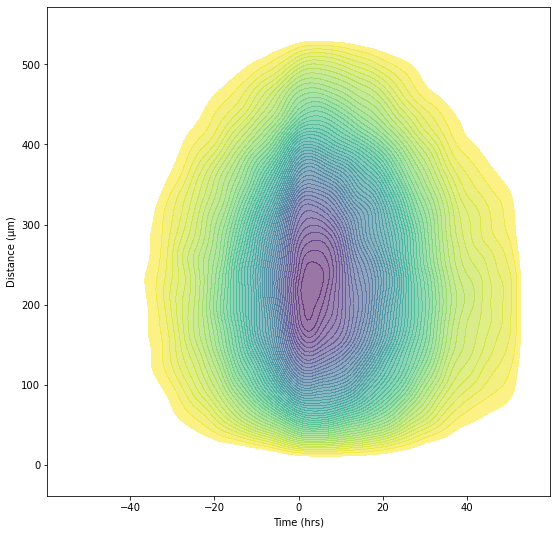

In [9]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
plot = seaborn.kdeplot(
    cumu_df['Time (hrs)'], 
    cumu_df['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)

### Discussion of above graph (N_events KDE distribution)

The peak then fall along the x axis, temporally, of the distribution of wild-type divisions around focal scribble apoptoses is most likely a result of the underlying distribution of scribble apoptoses. Scr. apops. happen more towards the end of the movies so there is likely to be fewer and fewer divisions at greater and greater time points since t = 0. However, this does not account for the marked asymmetry around the central t = 0 time point. Or does it? Uhhhhh. Comparing to the control plot (2 plots down) it seems like there might be a spatial constraint on the distribution of wild-type mitoses...

### KDE plot for wild-type cells around Scr. apops

In [2]:
dirname = dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon'

In [3]:
files = glob.glob(os.path.join(dirname, '*N_cells*.csv'))

In [4]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos4_Scr-142_N_cells_wt_rad_1600_t_range_1600_focal_t_347.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0817_Pos23_Scr-48_N_cells_wt_rad_1600_t_range_1600_focal_t_729.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos11_Scr-277_N_cells_wt_rad_1600_t_range_1600_focal_t_674.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos23_Scr-968_N_cells_wt_rad_1600_t_range_1600_focal_t_700.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos3_Scr-48_N_cells_wt_rad_1600_t_range_1600_focal_t_897.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos5_Scr-146_N_cells_wt_rad_1600_t_range_1600_focal_t_318.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1

In [5]:
len(files)

1839

### Cumulative KDE measures 

In [6]:
cumu_df_N_cells = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files[0:100]): ### cropping for memory):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    cumu_df_N_cells.append(df)
cumu_df_N_cells = pd.concat(cumu_df_N_cells, axis = 0, ignore_index = True)

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-6-af525b2b8150>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-6-af525b2b8150>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [7]:
cumu_df_N_cells['Time (hrs)'] = cumu_df_N_cells['Time']*(4/60)
cumu_df_N_cells['Distance (μm)'] = cumu_df_N_cells['Distance']/3

In [8]:
cumu_df_N_cells

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,73,918,-268,-17.866667,306.000000
1,68,1189,-268,-17.866667,396.333333
2,66,1039,-268,-17.866667,346.333333
3,65,1562,-268,-17.866667,520.666667
4,62,1273,-268,-17.866667,424.333333
...,...,...,...,...,...
19757992,3567,656,382,25.466667,218.666667
19757993,3568,854,382,25.466667,284.666667
19757994,3569,1164,382,25.466667,388.000000
19757995,3570,574,382,25.466667,191.333333


# Cumulative KDE for N_cells (hours/ums)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


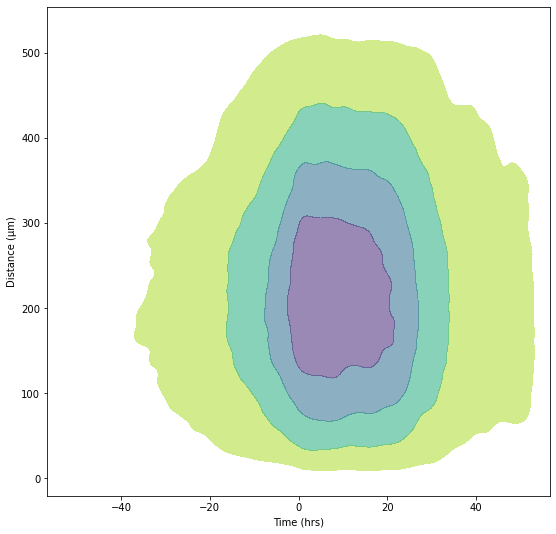

In [9]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
plot = seaborn.kdeplot(
    cumu_df_N_cells['Time (hrs)'], 
    cumu_df_N_cells['Distance (μm)'],
    n_levels=5, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


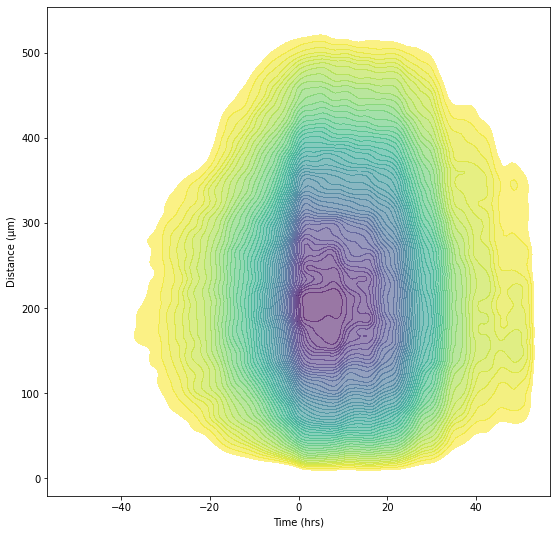

In [10]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
plot = seaborn.kdeplot(
    cumu_df_N_cells['Time (hrs)'], 
    cumu_df_N_cells['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)

# The same but with control expts

In [10]:
dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/'

In [17]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [12]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0797_Pos21_wt1425_N_events_wtdiv_rad_1600_t_range_1600_focal_t_531.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos4_wt523_N_events_wtdiv_rad_1600_t_range_1600_focal_t_940.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0797_Pos18_wt2027_N_events_wtdiv_rad_1600_t_range_1600_focal_t_636.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0801_Pos5_wt143_N_events_wtdiv_rad_1600_t_range_1600_focal_t_365.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0796_Pos22_wt1835_N_events_wtdiv_rad_1600_t_range_1600_focal_t_794.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0798_Pos22_wt4_N_events_wtdiv_rad_1600_t_range_1600_focal_t_177.csv',
 '/home/nathan/data/results/radial_analys

In [18]:
## crop number of files
files = files[0:10000]

In [24]:
control_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    try:
        df = pd.read_csv(file)
        df.columns= ['Cell ID', 'Distance', 'Time']
        ### tidy up dataframe
        df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
        df['Time'] = df['Time'].str.replace('[()]', '')
        df = df.astype(int)
        ### normalise time
        apop_time = int(re.search('t_(\d+)', file).group(1))
        df['Time'] = df['Time'] - apop_time
        control_df.append(df)
    except:
        print('Dont like', file)
control_df = pd.concat(control_df, axis = 0, ignore_index = True)

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-24-238754aea8db>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-24-238754aea8db>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt157_N_events_wtdiv_rad_1600_t_range_1600_focal_t_825.csv
Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt162_N_events_wtdiv_rad_1600_t_range_1600_focal_t_858.csv
Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt162_N_events_wtdiv_rad_1600_t_range_1600_focal_t_860.csv
Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt157_N_events_wtdiv_rad_1600_t_range_1600_focal_t_891.csv
Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt161_N_events_wtdiv_rad_1600_t_range_1600_focal_t_868.csv
Dont like /home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control/GV0794_Pos6_wt161_N_events_wtdiv_rad_1600_t_range_1600_focal_t_899.csv
Dont like 

In [26]:
control_df['Time (hrs)'] = control_df['Time']*(4/60)
control_df['Distance (μm)'] = control_df['Distance']/3

In [27]:
control_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,7,697,-46,-3.066667,232.333333
1,162,931,94,6.266667,310.333333
2,218,599,-6,-0.400000,199.666667
3,284,1237,-28,-1.866667,412.333333
4,382,333,-34,-2.266667,111.000000
...,...,...,...,...,...
2368220,624,351,456,30.400000,117.000000
2368221,651,352,527,35.133333,117.333333
2368222,683,591,496,33.066667,197.000000
2368223,694,630,507,33.800000,210.000000


# Control KDE plot

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of wild-type mitoses around random time points')

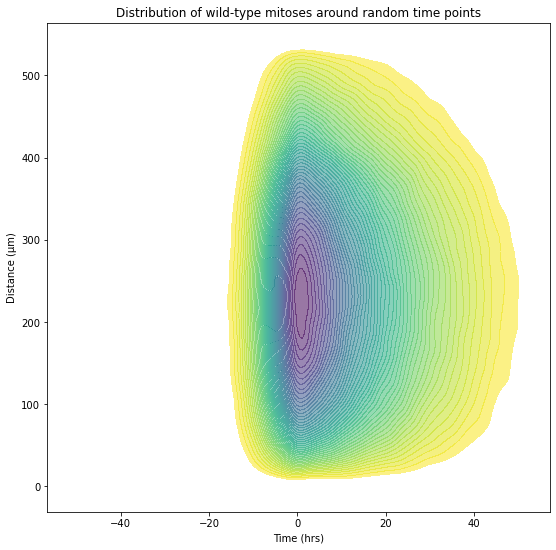

In [28]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    control_df['Time (hrs)'], 
    control_df['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
ax.set_title('Distribution of wild-type mitoses around random time points')

# Exploring different control analysis measures

Just a distribution of wild-type mitoses regardless of focal time?